# Worldwide Airports Dataset Analysis

This analysis aims to explore the [Global Aviation Hub: Dataset of Airports Worldwide](https://www.kaggle.com/datasets/harshalhonde/global-aviation-hub-dataset-of-airports-worldwide/data), from Kagle, by Harshal H, for learning purposes only.
Here I practice data cleanup, datasets and series manipulation and insights visualization.
There are no pre-defined objectives, so, as I explore the data I will dive into whatever I stumble on along the way.

Dataset Columns:
- **Airport Identifiers**: Unique identifiers and codes for each airport, including ICAO, IATA, and local codes.
- **Geographical Coordinates**: Precise latitude and longitude coordinates for accurate mapping and analysis.
- **Elevation**: Elevation data in feet for each airport's location.
- **Geographical Region**: Information about the continent, country, and region where each airport is situated.
- **Municipality**: The city or municipality associated with each airport's location. 
- **Scheduled Service**: Indicates whether the airport offers scheduled commercial air services.
- **Useful Links**: Links to homepages and Wikipedia pages for further information.
- **Keywords**: Keywords that provide additional context and categorization for each airport.

# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kagglehub
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geodatasets

# Get the dataset and setup the pandas dataframe

In [3]:
# Download latest version, at the time of writing this it is version "1".
path = kagglehub.dataset_download("harshalhonde/global-aviation-hub-dataset-of-airports-worldwide")

df = pd.read_csv(f"{path}/airports .csv")
df.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


# Cleaning up the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76367 entries, 0 to 76366
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76367 non-null  int64  
 1   ident              76367 non-null  object 
 2   type               76367 non-null  object 
 3   name               76367 non-null  object 
 4   latitude_deg       76367 non-null  float64
 5   longitude_deg      76367 non-null  float64
 6   elevation_ft       61969 non-null  float64
 7   continent          39372 non-null  object 
 8   iso_country        76108 non-null  object 
 9   iso_region         76367 non-null  object 
 10  municipality       71317 non-null  object 
 11  scheduled_service  76367 non-null  object 
 12  gps_code           41345 non-null  object 
 13  iata_code          8889 non-null   object 
 14  local_code         32792 non-null  object 
 15  home_link          3694 non-null   object 
 16  wikipedia_link     110

We can see that all airports have non-null data on important columns like: ident, type, name, latitude, longitude and iso_region.

In the other hand not all rows of the iso_country and municipality columns are filled. We will see how those null values are distributed. Maybe on big and developed countries the data is all there for us to explore.

In [5]:
df.iso_region.value_counts()

iso_region
US-TX     3659
US-CA     2331
US-FL     1228
BR-SP     1218
GB-ENG    1126
          ... 
BJ-CO        1
SA-11        1
SA-06        1
BJ-AL        1
MN-071       1
Name: count, Length: 2891, dtype: int64

In [6]:
df.query("iso_region.str.contains('US-')").iso_region.value_counts()

iso_region
US-TX     3659
US-CA     2331
US-FL     1228
US-IL     1093
US-AK     1047
US-PA     1037
US-AZ      970
US-OH      907
US-LA      851
US-NY      778
US-IN      770
US-WA      726
US-MO      720
US-OK      676
US-WI      670
US-MI      650
US-MN      648
US-GA      637
US-CO      629
US-OR      621
US-AR      602
US-NC      581
US-VA      566
US-KS      533
US-AL      477
US-NJ      464
US-NM      440
US-ID      439
US-MT      421
US-TN      415
US-UT      409
US-IA      409
US-NV      405
US-MS      355
US-NE      344
US-ND      335
US-KY      321
US-MD      291
US-MA      271
US-ME      267
US-SC      261
US-SD      231
US-NH      208
US-WY      207
US-CT      167
US-WV      148
US-HI      122
US-VT      120
US-DE       60
US-RI       43
US-DC       20
US-U-A       1
Name: count, dtype: int64

In [7]:
len(df.query("iso_region.str.contains('US-')").iso_region.unique())

52

In [8]:
df.query("iso_region.str.contains('BR-')").iso_region.value_counts()

iso_region
BR-SP     1218
BR-MT     1067
BR-MS      803
BR-MG      515
BR-BA      400
BR-PA      381
BR-GO      373
BR-RJ      276
BR-RS      205
BR-PR      203
BR-TO      167
BR-MA      165
BR-SC      153
BR-RR      135
BR-CE      130
BR-AM      113
BR-PI      104
BR-RO       95
BR-PE       92
BR-DF       40
BR-ES       39
BR-RN       39
BR-AL       34
BR-PB       29
BR-AC       28
BR-AP       26
BR-SE        9
BR-U-A       5
Name: count, dtype: int64

In [9]:
len(df.query("iso_region.str.contains('BR-')").iso_region.unique())

28

We can see from the US and BR examples above that the region column is formed by the name of the iso code of the country followed by the iso code of its states.
Considering all region rows are filled, we be able to use that to make the country column complete.

In [10]:
df[df['iso_country'].isna()]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
25749,315385,FYAA,small_airport,Ai-Ais Airport,-27.995000,17.596600,2000.0,AF,NaN,NA-KA,Ai-Ais,no,FYAA,AIW,NaN,NaN,NaN,NaN
25750,29539,FYAB,small_airport,Aroab B Airport,-26.776100,19.633101,3235.0,AF,NaN,NA-KA,Aroab,no,FYAB,NaN,NaN,NaN,NaN,NaN
25751,315405,FYAK,small_airport,Aussenkehr Airport,-28.458700,17.464500,970.0,AF,NaN,NA-KA,Aussenkehr,no,FYAK,NaN,NaN,NaN,NaN,NaN
25752,29534,FYAM,small_airport,Aminuis Airstrip,-23.655800,19.351700,4012.0,AF,NaN,NA-OH,Aminuis,no,FYAM,NaN,NaN,NaN,NaN,NaN
25753,3024,FYAR,medium_airport,Arandis Airport,-22.461875,14.979322,1905.0,AF,NaN,NA-ER,Arandis,no,FYAR,ADI,NaN,NaN,https://en.wikipedia.org/wiki/Arandis_Airport,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46161,322415,NA-0175,small_airport,Farm Dawib Ost Landing Strip,-21.774528,15.515361,3503.0,AF,NaN,NA-ER,Hohenstein Lodge,no,NaN,NaN,NaN,NaN,NaN,NaN
46162,322416,NA-0176,small_airport,Farm Gurus Landing Strip,-24.076750,17.610417,4061.0,AF,NaN,NA-HA,Kalkrand,no,NaN,NaN,NaN,NaN,NaN,NaN
46163,345911,NA-0177,small_airport,Desert Rhino Camp Airstrip,-20.036661,13.844147,NaN,AF,NaN,NA-KU,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN
46164,351688,NA-0178,small_airport,Namushasha River Lodge Airport,-17.983840,23.309320,3161.0,AF,NaN,NA-CA,Ngonga,no,NaN,NaN,NaN,NaN,NaN,NaN


We can extract the country codes from the region like:

In [11]:
df[df['iso_country'].isna()]['iso_region'].str[:2]

25749    NA
25750    NA
25751    NA
25752    NA
25753    NA
         ..
46161    NA
46162    NA
46163    NA
46164    NA
46165    NA
Name: iso_region, Length: 259, dtype: object

Seems all values are "NA", from Namibia...

In [12]:
df[df['iso_country'].isna()]['iso_region'].str[:2].unique()

array(['NA'], dtype=object)

Considering Namibia is a very big country, let's consider all the 259 rows with NaN country are from there.

In [13]:
df.loc[df['iso_country'].isna(), 'iso_country'] = df.loc[df['iso_country'].isna(), 'iso_region'].str[:2]

Namibia country codes are correctly set now

In [14]:
df[df['iso_country'].isna()]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76367 entries, 0 to 76366
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76367 non-null  int64  
 1   ident              76367 non-null  object 
 2   type               76367 non-null  object 
 3   name               76367 non-null  object 
 4   latitude_deg       76367 non-null  float64
 5   longitude_deg      76367 non-null  float64
 6   elevation_ft       61969 non-null  float64
 7   continent          39372 non-null  object 
 8   iso_country        76367 non-null  object 
 9   iso_region         76367 non-null  object 
 10  municipality       71317 non-null  object 
 11  scheduled_service  76367 non-null  object 
 12  gps_code           41345 non-null  object 
 13  iata_code          8889 non-null   object 
 14  local_code         32792 non-null  object 
 15  home_link          3694 non-null   object 
 16  wikipedia_link     110

Let's check the continent column now, see if we can do something about it in an easy way...

In [16]:
df[df['continent'].isna()].iso_country.unique()

array(['US', 'PR', 'AG', 'AI', 'MX', 'AW', 'GL', 'GB', 'BM', 'BQ', 'BS',
       'BZ', 'CA', 'CO', 'CR', 'CU', 'PA', 'DO', 'GT', 'GP', 'HN', 'HT',
       'JM', 'KN', 'KY', 'PM', 'TC', 'GD', 'NI', 'MQ', 'SV', 'MF', 'VI',
       'VE', 'BB', 'DM', 'BL', 'LC', 'CW', 'SX', 'VG', 'MS', 'TT', 'VC'],
      dtype=object)

44 countries with non set continent value. Laborous but doable...

Let's start by checking how existing continent values are set.

In [17]:
df.continent.unique()

array([nan, 'OC', 'AF', 'AN', 'EU', 'AS', 'SA'], dtype=object)

Considering South America is by itself, I would say we are missing NA(North America) and CA(Central America).

Now that we know exactly what to insert on Continent values, let's map the countries to their continents.

In [18]:
country_to_continent = {
    "US": "NA", "PR": "NA", "AG": "NA", "AI": "NA", "MX": "NA", "AW": "NA", "GL": "NA", "GB": "EU", "BM": "NA", "BQ": "NA", "BS": "NA",
    "BZ": "CA", "CA": "NA", "CO": "SA", "CR": "CA", "CU": "NA", "PA": "CA", "DO": "NA", "GT": "CA", "GP": "NA", "HN": "CA", "HT": "NA",
    "JM": "NA", "KN": "NA", "KY": "NA", "PM": "NA", "TC": "NA", "GD": "NA", "NI": "CA", "MQ": "NA", "SV": "CA", "MF": "NA", "VI": "NA",
    "VE": "SA", "BB": "NA", "DM": "NA", "BL": "NA", "LC": "NA", "CW": "NA", "SX": "NA", "VG": "NA", "MS": "NA", "TT": "NA", "VC": "NA"
}

df.loc[df['continent'].isna(), 'continent'] = df.loc[df['continent'].isna(), 'iso_country'].map(country_to_continent)

df.loc[df['continent'].isna()].head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76367 entries, 0 to 76366
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76367 non-null  int64  
 1   ident              76367 non-null  object 
 2   type               76367 non-null  object 
 3   name               76367 non-null  object 
 4   latitude_deg       76367 non-null  float64
 5   longitude_deg      76367 non-null  float64
 6   elevation_ft       61969 non-null  float64
 7   continent          76367 non-null  object 
 8   iso_country        76367 non-null  object 
 9   iso_region         76367 non-null  object 
 10  municipality       71317 non-null  object 
 11  scheduled_service  76367 non-null  object 
 12  gps_code           41345 non-null  object 
 13  iata_code          8889 non-null   object 
 14  local_code         32792 non-null  object 
 15  home_link          3694 non-null   object 
 16  wikipedia_link     110

Considering would be hard and time consuming to fill elevation and municipality missing data, let's call the data cleanup complete for this study.

# Exploring data

## How many countries does this dataset include?

In [20]:
len(df.iso_country.unique())

245

## What are the airport types we have?

In [21]:
df.type.unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

## Is there a classification required for having scheduled services on an airport?

In [22]:
df.groupby(["type", "scheduled_service"])[["scheduled_service"]].count()

scheduled_service
type           scheduled_service                   
balloonport    no                                49
closed         no                             10778
               yes                               20
heliport       no                             19298
               yes                              101
large_airport  no                                 9
               yes                              458
medium_airport no                              1958
               yes                             2794
seaplane_base  no                              1128
               yes                               36
small_airport  no                             38883
               yes                              855

We can see that when it comes to medium and large airports the majority of them have scheduled services available. But their size doesn't influence that alone.

## What are the top 10 countries when it comes to the number of airports?

In [23]:
top_10_countries = df.groupby("iso_country")['id'].count().sort_values(ascending=False).head(10)
top_10_countries

iso_country
US    30581
BR     6844
JP     3430
CA     3073
AU     2576
MX     2288
RU     1551
KR     1400
GB     1398
DE     1037
Name: id, dtype: int64

1. USA
2. Brazil
3. Japan
4. Canada
5. Australia
6. Mexico
7. Russia
8. South Korea
9. United Kingdom of Great Britain and Northern Ireland
10. Germany

In [24]:
country_mapping = {
    "US": "United States of America",
    "BR": "Brazil",
    "JP": "Japan",
    "CA": "Canada",
    "AU": "Australia",
    "MX": "Mexico",
    "RU": "Russia",
    "KR": "South Korea",
    "GB": "United Kingdom",
    "DE": "Germany"
}

full_country_names = [country_mapping.get(code, code) for code in top_10_countries.index]

In [25]:
sns.set_theme()

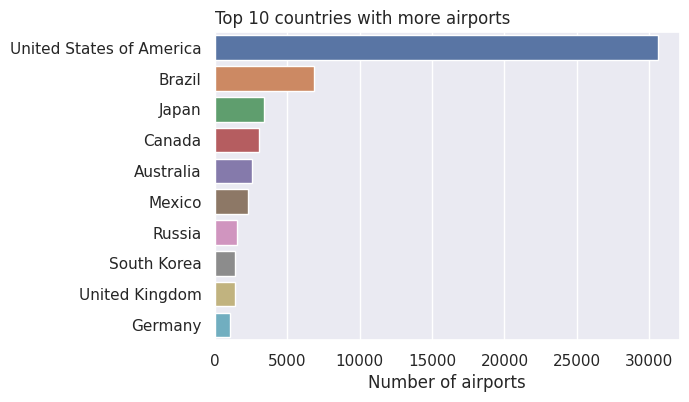

In [26]:
top_10_countries_fig, top_10_countries_ax = plt.subplots(figsize=(6,4))
top_10_countries_ax = sns.barplot(y= full_country_names, x=top_10_countries.values, hue=full_country_names, orient="h")
top_10_countries_ax.set_title("Top 10 countries with more airports", loc="left")
top_10_countries_ax.set_xlabel("Number of airports")
top_10_countries_ax.set_ylabel("")

plt.show()

## What are the top 10 countries with more airports (USA and Brazil excluded)?

As USA and Brazil have a huge number of airports in comparison to the other countries in the dataset, let's check the top 10 without considering USA and Brazil.

In [27]:
top_10_countries_no_usa_br = df.groupby("iso_country")['id'].count().sort_values(ascending=False)[2:12]
top_10_countries_no_usa_br

iso_country
JP    3430
CA    3073
AU    2576
MX    2288
RU    1551
KR    1400
GB    1398
DE    1037
FR    1001
AR     941
Name: id, dtype: int64

In [28]:
country_mapping_no_usa_br = {
    "JP": "Japan",
    "CA": "Canada",
    "AU": "Australia",
    "MX": "Mexico",
    "RU": "Russia",
    "KR": "South Korea",
    "GB": "United Kingdom",
    "DE": "Germany",
    "FR": "France",
    "AR": "Argentina"
}

full_country_names_no_usa_br = [country_mapping_no_usa_br.get(code, code) for code in top_10_countries_no_usa_br.index]

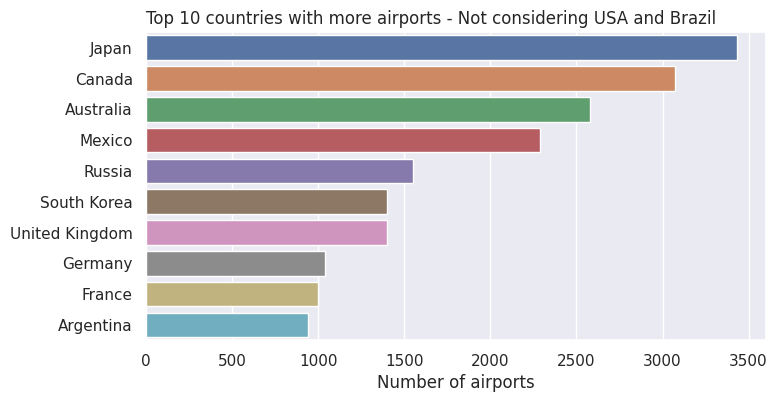

In [29]:
top_10_countries_no_usa_br_fig, top_10_countries_no_usa_br_ax = plt.subplots(figsize=(8,4))
top_10_countries_no_usa_br_ax = sns.barplot(y= full_country_names_no_usa_br, x=top_10_countries_no_usa_br.values, hue=full_country_names_no_usa_br, orient="h")
top_10_countries_no_usa_br_ax.set_title("Top 10 countries with more airports - Not considering USA and Brazil", loc="left")
top_10_countries_no_usa_br_ax.set_xlabel("Number of airports")
top_10_countries_no_usa_br_ax.set_ylabel("")

plt.show()

## What are the bottom 10 countries when it comes to the number of airports?

In [30]:
df.groupby("iso_country")['id'].count().sort_values(ascending=True).head(10)

iso_country
CW    1
SX    1
IO    1
VA    1
BL    1
NF    1
CX    1
NR    1
GM    1
GS    1
Name: id, dtype: int64

1. Curaçao
2. Sint Maarten
3. British Indian Ocean Territory
4. Holy See
5. Saint Barthélemy
6. Norfolk Island
7. Christmas Island
8. Nauru
9. Gambia
10. South Georgia and the South Sandwich Islands

These are the bottom 10 countries by the order they appear in the dataset, but there might be a few more small countries with only one airport (at least in this list):

In [31]:
iso_country_grouped_df_sizes = df.groupby("iso_country").size()

single_airport_countries = iso_country_grouped_df_sizes[iso_country_grouped_df_sizes == 1]

number_of_single_airport_countries = len(single_airport_countries)

print(f"Number of countries with a single airport: {number_of_single_airport_countries}")

Number of countries with a single airport: 15


In [32]:
iso_country_grouped_df_sizes.sort_values(ascending=True).head(15)

iso_country
CW    1
SX    1
IO    1
VA    1
BL    1
NF    1
CX    1
NR    1
GM    1
GS    1
CC    1
NU    1
JE    1
YT    1
GI    1
dtype: int64

11. Cocos Islands
12. Niue
13. Jersey
14. Mayotte
15. Gibraltar

## How is the distribution of airports throughout the USA map?

### How is the data completion considering only the USA?

In [33]:
df.query("iso_country == 'US'").info()

<class 'pandas.core.frame.DataFrame'>
Index: 30581 entries, 0 to 76364
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30581 non-null  int64  
 1   ident              30581 non-null  object 
 2   type               30581 non-null  object 
 3   name               30581 non-null  object 
 4   latitude_deg       30581 non-null  float64
 5   longitude_deg      30581 non-null  float64
 6   elevation_ft       28576 non-null  float64
 7   continent          30581 non-null  object 
 8   iso_country        30581 non-null  object 
 9   iso_region         30581 non-null  object 
 10  municipality       30524 non-null  object 
 11  scheduled_service  30581 non-null  object 
 12  gps_code           20247 non-null  object 
 13  iata_code          1967 non-null   object 
 14  local_code         21177 non-null  object 
 15  home_link          1136 non-null   object 
 16  wikipedia_link     2565 non

We can see that municipality is almost all filled. Would be nice to have it all set. We might approach that later on.

Anyway, that was just curiosity. I want now to use the latitude and longitude to plot the airports in a map.

### Plotting the USA Airports Map

First we create a copy of our dataset with only the USA airports.

In [34]:
usa_airports = df.query("iso_country == 'US'")

Now we create a GeoDataFrame using GeoPandas, which contains the geo points we need for plotting the map.

In [35]:
geometry = [Point(xy) for xy in zip(usa_airports['longitude_deg'], usa_airports['latitude_deg'])]
airports_gdf = GeoDataFrame(usa_airports, geometry=geometry, crs="EPSG:4326")

We now load the USA map:

In [36]:
usa_map = gpd.read_file(geodatasets.get_path("geoda.us_sdoh"))

And now we can plot the map...

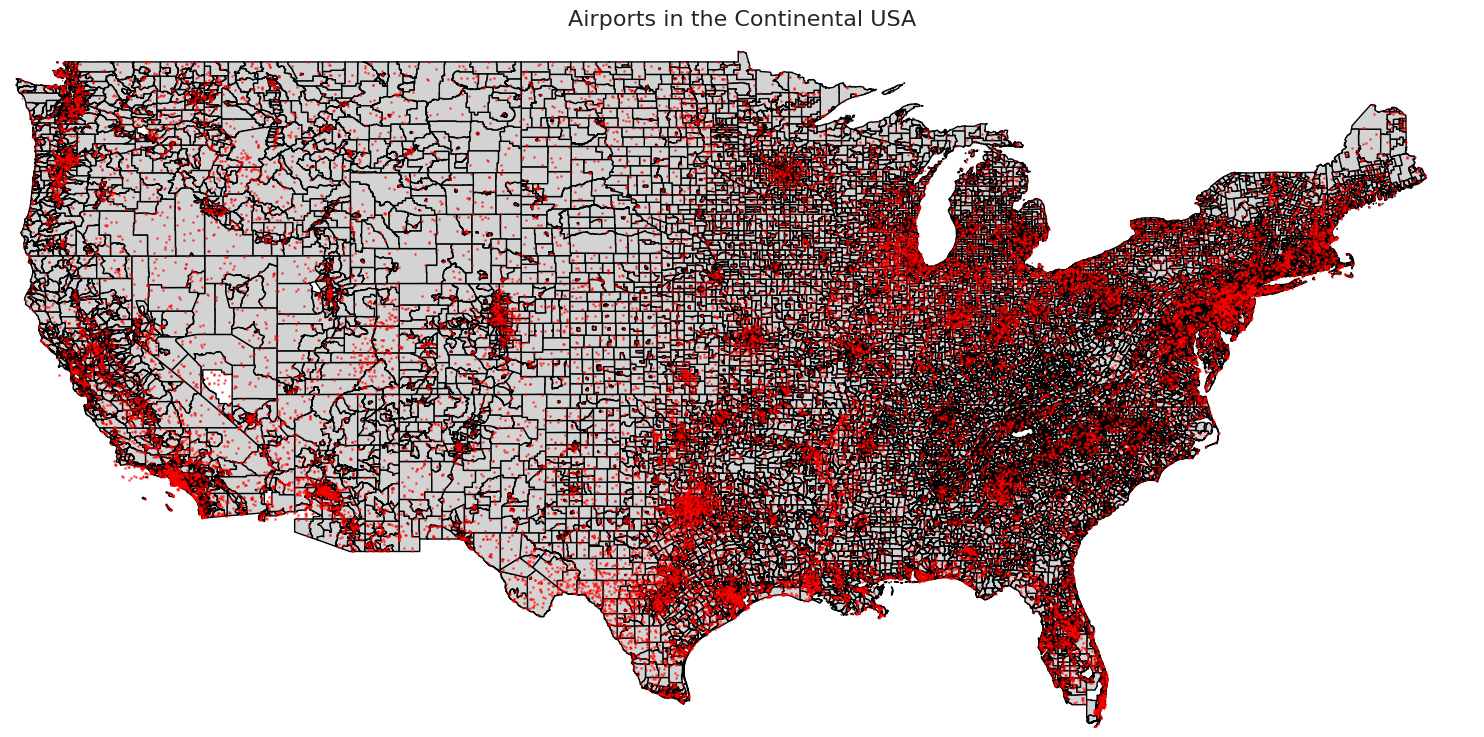

In [37]:
usa_airports_fig, usa_airports_ax = plt.subplots(figsize=(15,10))

# Plot the map
usa_map.plot(ax=usa_airports_ax, color='lightgrey', edgecolor='black')

# Plot the airports
airports_gdf.plot(ax=usa_airports_ax, color='red', markersize=1, alpha=0.5)

plt.title('Airports in the Continental USA', fontsize=16)
usa_airports_ax.axis('off')

# Adjust plot limits to focus on continental USA. Believe me, you want that.
plt.xlim(-125, -65)
plt.ylim(25, 50)

plt.tight_layout()
plt.show()

Let's do it again but only with active airports of types small, medium and large.

In [39]:
usa_airports = df.query("iso_country == 'US' and type in ('small_airport', 'medium_airport', 'large_airport')")

In [41]:
geometry = [Point(xy) for xy in zip(usa_airports['longitude_deg'], usa_airports['latitude_deg'])]
airports_gdf = GeoDataFrame(usa_airports, geometry=geometry, crs="EPSG:4326")

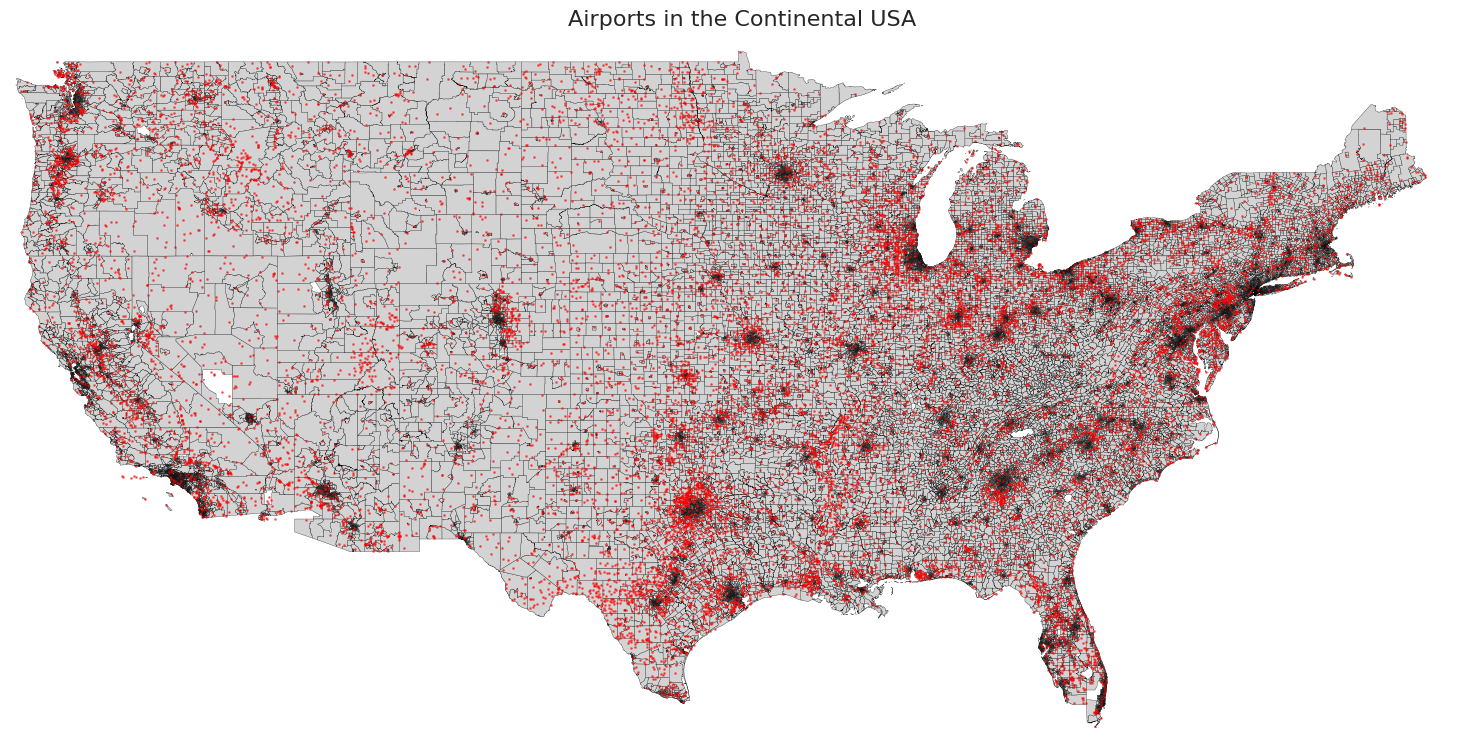

In [43]:
usa_airports_fig, usa_airports_ax = plt.subplots(figsize=(15,10))

# Plot the map
usa_map.plot(ax=usa_airports_ax, color='lightgrey', edgecolor='black', linewidth=0.2)

# Plot the airports
airports_gdf.plot(ax=usa_airports_ax, color='red', markersize=1, alpha=0.5)

plt.title('Airports in the Continental USA', fontsize=16)
usa_airports_ax.axis('off')

# Adjust plot limits to focus on continental USA. Believe me, you want that.
plt.xlim(-125, -65)
plt.ylim(25, 50)

plt.tight_layout()
plt.show()

### Including Alaska in the map

Would be nice to include Alaska in the map...